In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

C:\Users\Jocelyn\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


#### LOADING THE REVIEWS DATASETS 

In [2]:

df1=pd.read_csv("4-wheeler-EV-carwale.csv")  #contains reviews of 4 wheeler EVs obtained from carwale website

In [3]:
df1.shape

(129, 10)

In [4]:
df1.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [5]:
df1.isna().sum()

review             0
Exterior           0
Comfort            0
Performance        0
Fuel Economy       0
Value for Money    0
Condition          0
driven             0
rating             0
model_name         0
dtype: int64

In [6]:
# Fill missing values with the mean of the column
df1 = df1.fillna(df1.mean())


In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import re
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [8]:
import re
stop_words = stopwords.words('english')
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text=str(text)
    text = re.sub('[^A-Za-z]+', ' ', text)
    text=text.lower()
    return text
df1['review'] = df1['review'].apply(clean)
df1['review']= df1['review'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
df1['review']=df1['review'].str.replace('[^\w\s]','')
df1['review']

0      superb car like fantastic petroleum car speed ...
1      anti national worst service worst customer car...
2                                   super happy car good
3      pretty good car smooth glider fast car instant...
4      price difference petrol electronic could convi...
                             ...                        
124    good car overpriced little starting price l wo...
125    excellent vehicle driving dynamics evs afforda...
126    government subsidy becomes cheaper diesel car ...
127    yes love tata products true indian company tho...
128    planning buy driving car since long amazing gr...
Name: review, Length: 129, dtype: object

In [9]:
df1.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,superb car like fantastic petroleum car speed ...,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,anti national worst service worst customer car...,1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,super happy car good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,pretty good car smooth glider fast car instant...,5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,price difference petrol electronic could convi...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


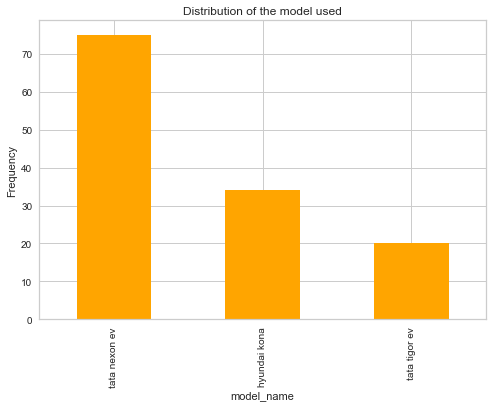

In [55]:
df1['model_name'].value_counts().plot(kind='bar',color='orange')
plt.xlabel('model_name')
plt.ylabel('Frequency')
plt.title('Distribution of the model used')
plt.show()

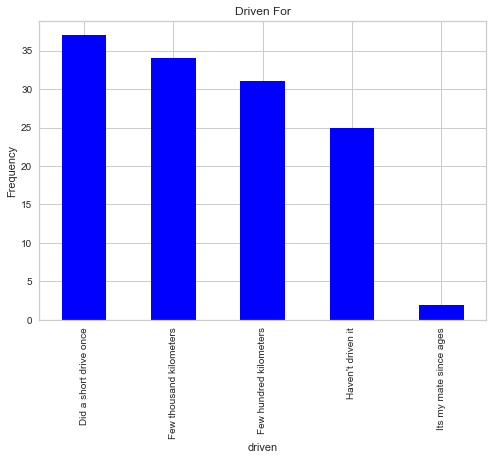

In [57]:
df1['driven'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('driven')
plt.ylabel('Frequency')
plt.title('Driven For')
plt.show()

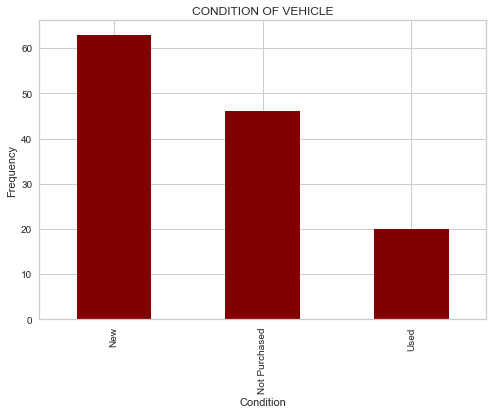

In [58]:
df1['Condition'].value_counts().plot(kind='bar',color='maroon')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('CONDITION OF VEHICLE')
plt.show()

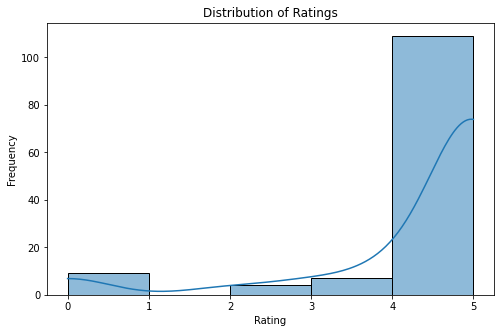

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df1['rating'], bins=5, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


In [12]:
def func(df_new):
    if df_new==3:
        return 0
    elif df_new <3:
        return -1
    else:
        return 1
df1['Target'] = df1['rating'].apply(func)
df1['Target']

0      1
1     -1
2      1
3      1
4      0
      ..
124    1
125    1
126    1
127    1
128    1
Name: Target, Length: 129, dtype: int64

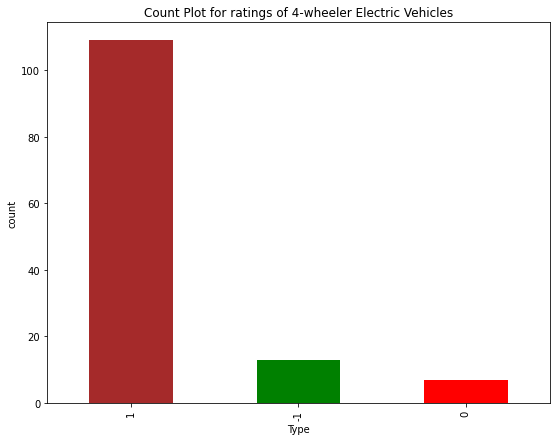

In [14]:
# Count plot for labels feature
plt.figure(figsize=(9,7))
df1.Target.value_counts().plot(kind='bar',color=['brown','green','red'])
plt.xlabel("Type")
plt.ylabel("count")
plt.title("Count Plot for ratings of 4-wheeler Electric Vehicles");

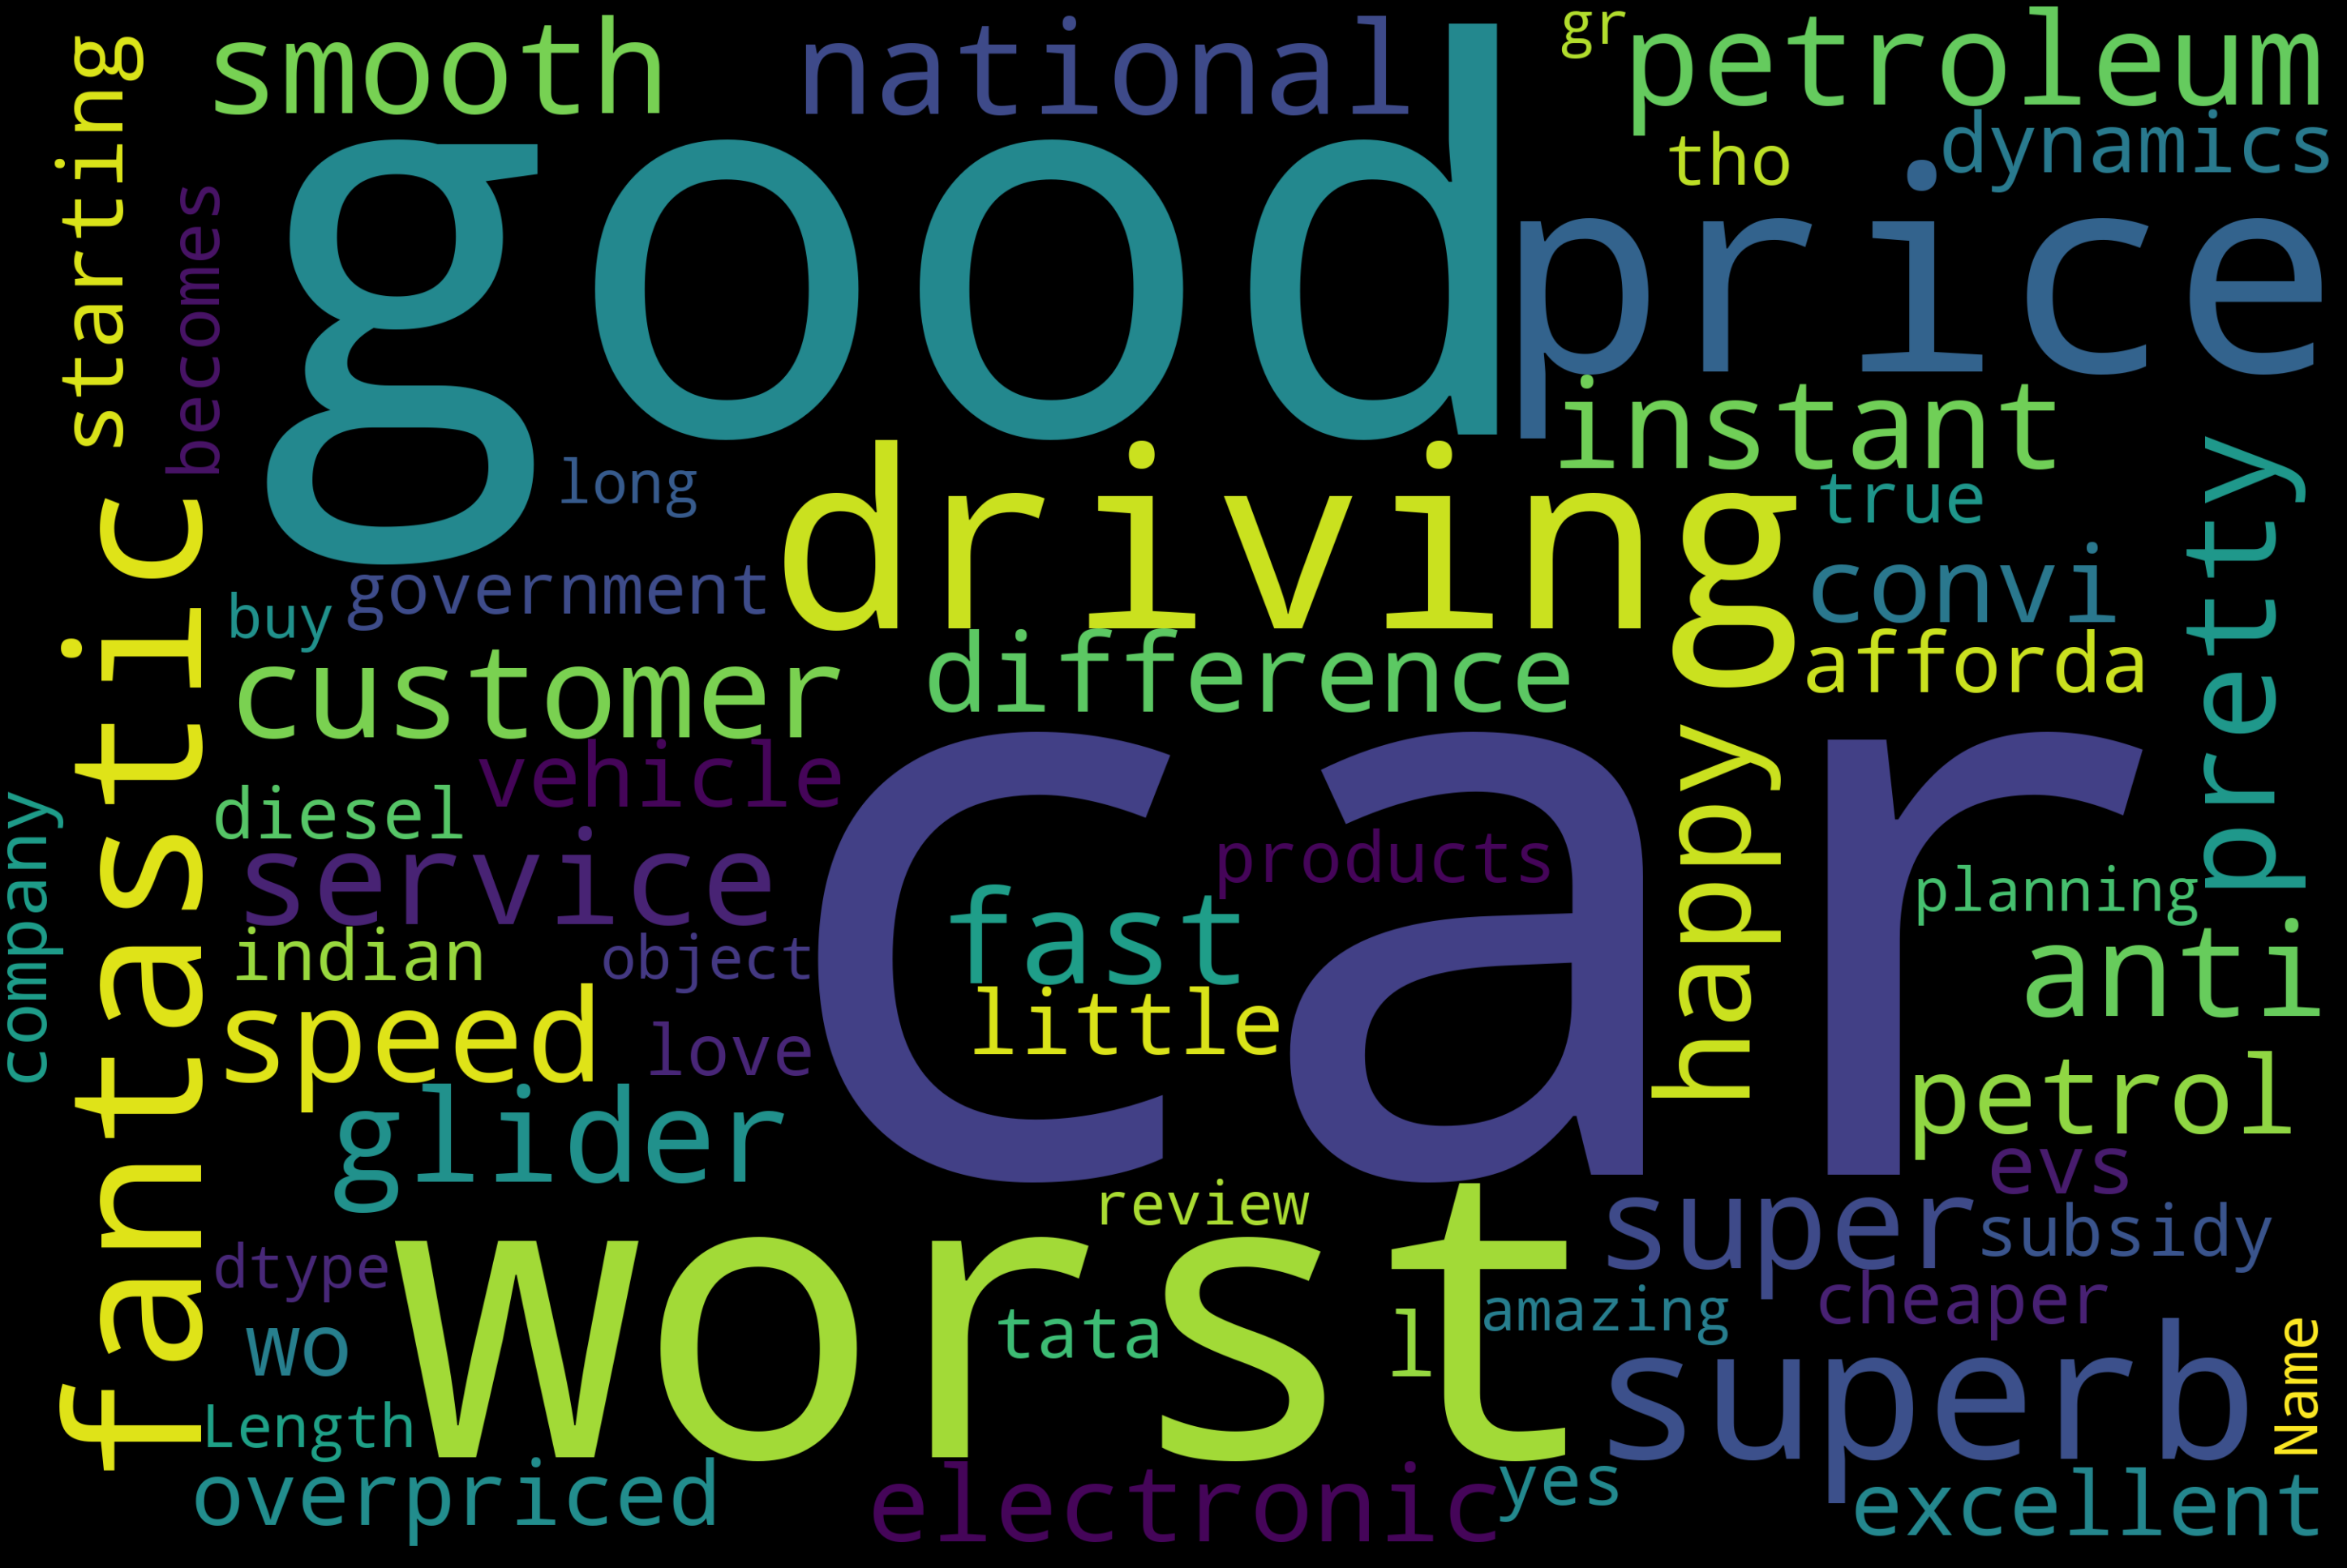

In [15]:
text = df1['review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [23]:
df1['review'].dropna(inplace=True)

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df1['Sentiment'] = df1['review'].apply(lambda x: sid.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jocelyn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


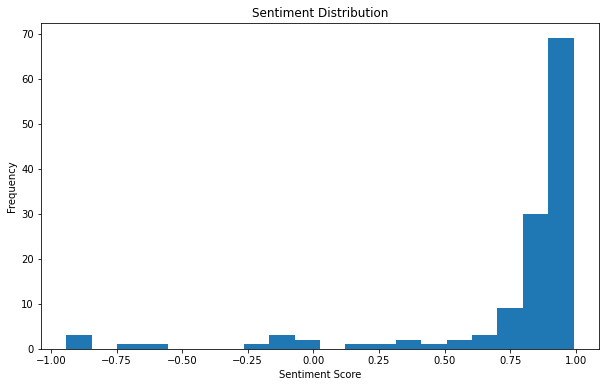

In [25]:
plt.figure(figsize=(10, 6))
df1['Sentiment'].plot(kind='hist', bins=20, title='Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [26]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1['review'])
X.shape

(129, 1217)

In [28]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\jocelyn\anaconda3\lib\site-packages (1.3.1)



DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [29]:
from collections import Counter
from imblearn.over_sampling import SMOTE
y=df1['Target']
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({1: 109, -1: 13, 0: 7})
Resampled dataset shape Counter({1: 109, -1: 109, 0: 109})


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)


In [31]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import plot_confusion_matrix

Logistic Regression Accuracy Score ->  98.78048780487805


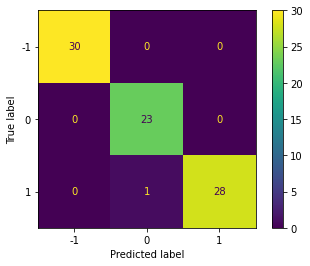

In [33]:
from sklearn.linear_model import LogisticRegression
Logi = LogisticRegression()
Logi.fit(X_train, Y_train)
# predict the labels on validation dataset
predictions_logi = Logi.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_logi, Y_test)*100)
cm = confusion_matrix(Y_test, predictions_logi, labels=Logi.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Logi.classes_)
disp.plot()
plt.show()


### CUSTOMER SEGMENTATION

In [34]:
df1.columns

Index(['review', 'Exterior', 'Comfort', 'Performance', 'Fuel Economy',
       'Value for Money', 'Condition', 'driven', 'rating', 'model_name',
       'Target', 'Sentiment'],
      dtype='object')

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [18]:
selected_columns = df1.iloc[:, [2, 3, 5]]
X=selected_columns.values

In [19]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

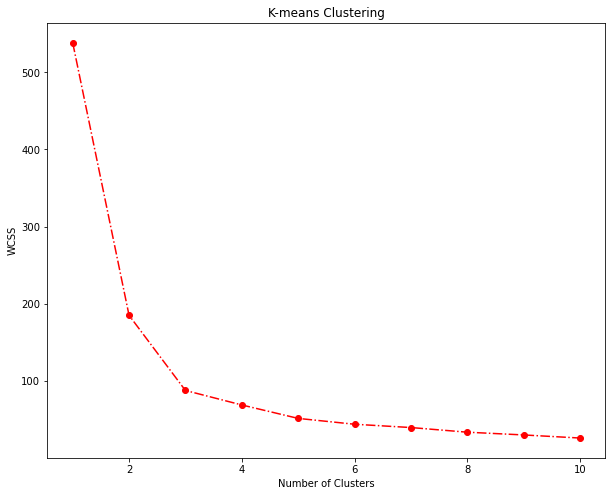

In [20]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [48]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
#
# Fit the KMeans model
#
y_clusters=km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.716


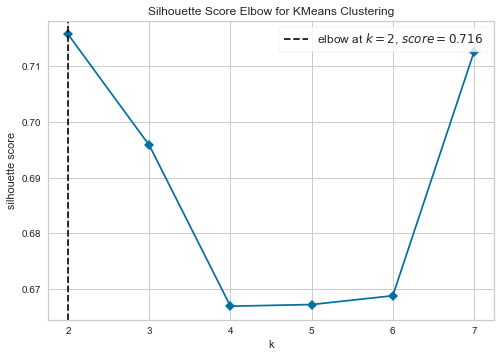

In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=123) 
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)

visualizer.fit(X)    
visualizer.poof()

In [50]:

df1['Cluster'] = km.labels_
df1.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name,Target,Cluster
0,superb car like fantastic petroleum car speed ...,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona,1,0
1,anti national worst service worst customer car...,1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona,-1,1
2,super happy car good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona,1,0
3,pretty good car smooth glider fast car instant...,5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona,1,0
4,price difference petrol electronic could convi...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona,0,0


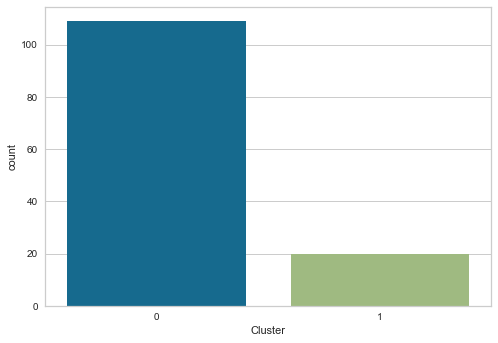

In [51]:
sns.countplot(df1['Cluster'])

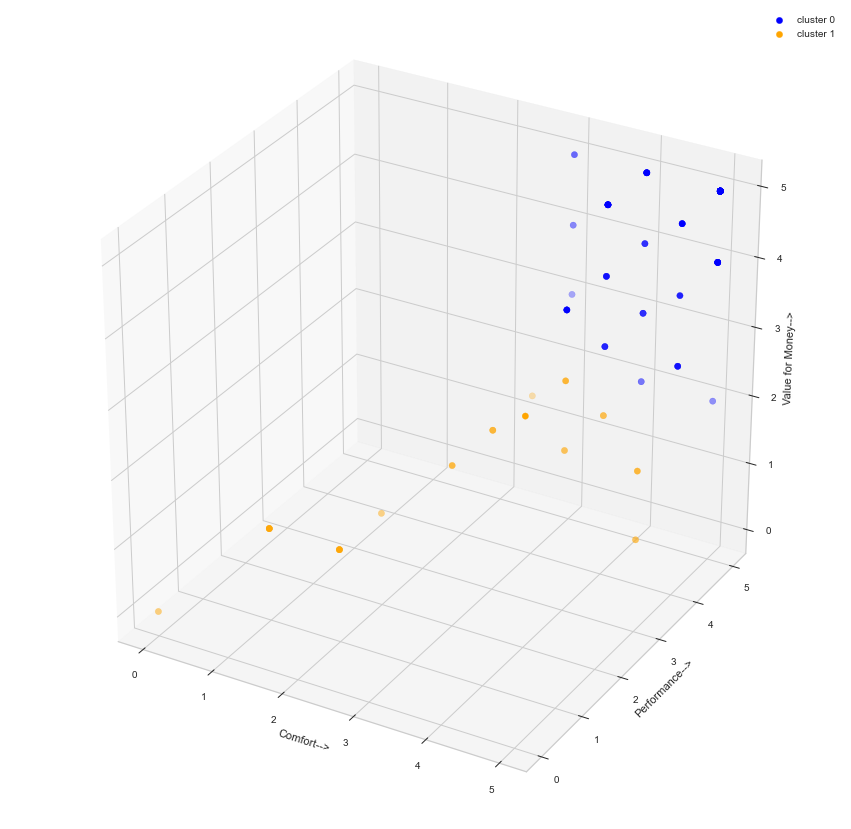

In [52]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.set_xlabel('Comfort-->')
ax.set_ylabel('Performance-->')
ax.set_zlabel('Value for Money-->')
ax.legend()
plt.show()